In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [14]:
cars_df=pd.read_csv('carPrice.csv')

In [15]:
cars_df.head()

,car_ID,symboling,carCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


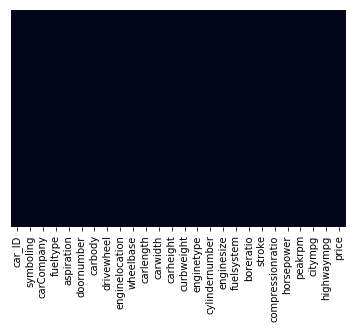

In [16]:
sns.heatmap(cars_df.isnull(), cbar=False, yticklabels=False)

In [17]:
cars_df.columns

Index(['car_ID', 'symboling', 'carCompany', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [18]:
company=pd.get_dummies(cars_df['carCompany'],drop_first=True)
fuel=pd.get_dummies(cars_df['fueltype'],drop_first=True)
aspiration=pd.get_dummies(cars_df['aspiration'],drop_first=True)
doornumber=pd.get_dummies(cars_df['doornumber'],drop_first=True)
carbody=pd.get_dummies(cars_df['carbody'],drop_first=True)
drivewheel=pd.get_dummies(cars_df['drivewheel'],drop_first=True)
enginelocation=pd.get_dummies(cars_df['enginelocation'],drop_first=True)
enginetype=pd.get_dummies(cars_df['enginetype'],drop_first=True)
cylindernumber=pd.get_dummies(cars_df['cylindernumber'],drop_first=True)
fuelsystem=pd.get_dummies(cars_df['fuelsystem'],drop_first=True)

In [20]:
cars_df.drop(['carCompany','fueltype','aspiration','doornumber',
              'carbody','drivewheel','enginelocation','enginetype',
             'cylindernumber','fuelsystem'],axis=1,inplace=True)

In [21]:
cars_df=pd.concat([cars_df,company,fuel,aspiration,doornumber,
           carbody,drivewheel,enginelocation,enginetype,
           cylindernumber,fuelsystem],axis=1)

In [25]:
cars_df.drop(['car_ID'],axis=1,inplace=True)

In [26]:
cars_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
cars_df['price']=pd.to_numeric(cars_df['price'])

In [44]:
X=cars_df.drop(['price'],axis=1)
y=cars_df['price']

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3,random_state=100)

In [46]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
predictions=lm.predict(X_test)

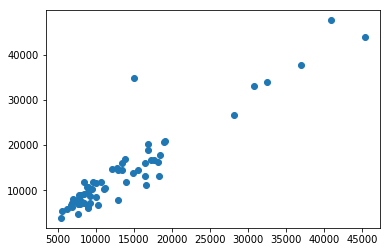

In [48]:
plt.scatter(y_test, predictions)

In [50]:
from sklearn import metrics

In [52]:
metrics.explained_variance_score(y_test, predictions)

0.8429790607958133

In [54]:
metrics.mean_absolute_error(y_test, predictions)

2030.952907778227

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


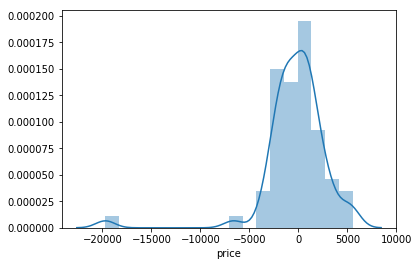

In [55]:
sns.distplot(y_test-predictions)